In [138]:
pip install sklearn.preprocessing

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [139]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
data=np.random.exponential(scale=2, size=1000)
df=pd.DataFrame({"Salary":data})
df.head()

,Salary
0,0.578266
1,1.717947
2,10.282433
3,2.754905
4,5.211549


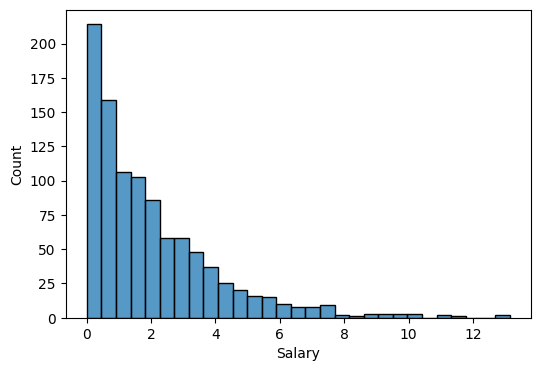

In [141]:
plt.figure(figsize=(6, 4))
sns.histplot(df.Salary)
plt.show()

In [142]:
df.Salary.skew()

np.float64(1.828640251663885)

In [143]:
df["updated_salary"], lamda_val = boxcox(df.Salary)
df.head()

,Salary,updated_salary
0,0.578266,-0.507742
1,1.717947,0.584333
2,10.282433,3.288547
3,2.754905,1.171993
4,5.211549,2.099348


In [144]:
lamda_val

np.float64(0.2803487459669466)

In [145]:
df.updated_salary.skew()

np.float64(-0.053521448133411996)

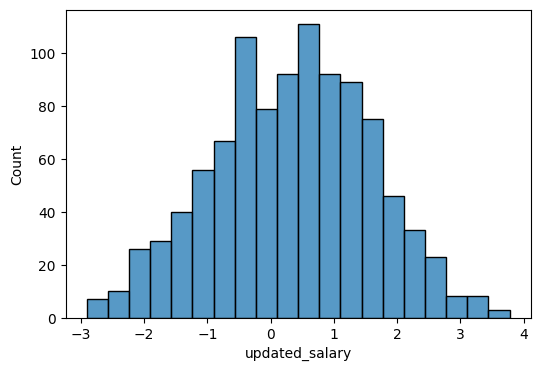

In [146]:
plt.figure(figsize=(6, 4))
sns.histplot(df.updated_salary)
plt.show()

In [147]:
data=np.random.exponential(scale=2, size=1000)
data=10-data
df=pd.DataFrame({"Salary2":data})
df.head()

,Salary2
0,8.817902
1,7.835068
2,7.241495
3,8.003118
4,8.165553


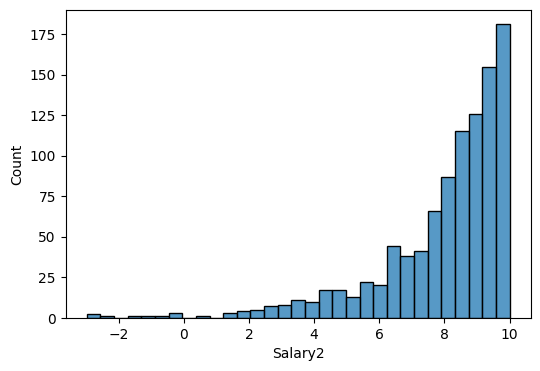

In [148]:
plt.figure(figsize=(6, 4))
sns.histplot(df.Salary2)
plt.show()  

In [149]:
df.Salary2.skew()

np.float64(-1.8872820270740147)

In [150]:
df["reflex_salary"]=df.Salary2.max()-df.Salary2+1
df.head()

,Salary2,reflex_salary
0,8.817902,2.181752
1,7.835068,3.164586
2,7.241495,3.758159
3,8.003118,2.996536
4,8.165553,2.834101


In [151]:
max(df.reflex_salary),min(df.reflex_salary)

(13.977476475937252, 1.0)

In [152]:
df["transformed_salary"]=np.log(df.reflex_salary)
df.head()

,Salary2,reflex_salary,transformed_salary
0,8.817902,2.181752,0.780128
1,7.835068,3.164586,1.152022
2,7.241495,3.758159,1.323929
3,8.003118,2.996536,1.097457
4,8.165553,2.834101,1.041725


In [153]:
df.transformed_salary.skew()

np.float64(0.47055070284074496)

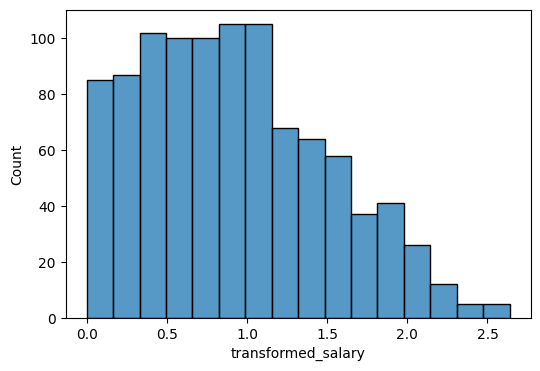

In [154]:
plt.figure(figsize=(6, 4))
sns.histplot(df.transformed_salary)
plt.show() 

In [155]:
data=pd.read_csv(r"C:\\Users\\Sanketreddy\\AppData\\Local\\Packages\\5319275A.WhatsAppDesktop_cv1g1gvanyjgm\\LocalState\\sessions\\C4FC6A3FA7AEB8D1004ACD58B7C5B1193F260465\\transfers\\2026-07\\test2.csv")
data.head()

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,NaN,IT,62000.0
4,4,Eve,29.0,HR,NaN


In [156]:
data.shape

(6, 5)

In [157]:
data.Age=data.Age.fillna(value=data.Age.mean())
data.Salary=data.Salary.fillna(value=data.Salary.mean())
data

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,28.8,IT,62000.0
4,4,Eve,29.0,HR,58400.0
5,5,Alice,25.0,HR,50000.0


In [158]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
encoder=LabelEncoder()
data["transformed_Name"]=encoder.fit_transform(data.Name)
data.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_Name
0,0,Alice,25.0,HR,50000.0,0
1,1,Bob,30.0,IT,60000.0,1
2,2,Charlie,35.0,Finance,70000.0,2
3,3,David,28.8,IT,62000.0,3
4,4,Eve,29.0,HR,58400.0,4


In [171]:
encoder2=OneHotEncoder(sparse_output=False)
encoder2

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",False
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'error'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_categ

In [172]:

encoded=encoder2.fit_transform(data[["Department"]])
encoded


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [173]:
encoder2.get_feature_names_out()
encoded

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [176]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
data["scaled_Salary"]=scaler.fit_transform(data[["Salary"]])
data

,Unnamed: 0,Name,Age,Department,Salary,transformed_Name,scaled_Salary
0,0,Alice,25.0,HR,50000.0,0,-1.205755
1,1,Bob,30.0,IT,60000.0,1,0.229668
2,2,Charlie,35.0,Finance,70000.0,2,1.665091
3,3,David,28.8,IT,62000.0,3,0.516752
4,4,Eve,29.0,HR,58400.0,4,0.000000
5,5,Alice,25.0,HR,50000.0,0,-1.205755


In [177]:
data=pd.read_csv(r"C:\\Users\\Sanketreddy\\AppData\\Local\\Packages\\5319275A.WhatsAppDesktop_cv1g1gvanyjgm\\LocalState\\sessions\\C4FC6A3FA7AEB8D1004ACD58B7C5B1193F260465\\transfers\\2026-07\\data_visualization.csv")
data

,Unnamed: 0,Student_ID,Name,Gender,Department,Age,Math_Score,Science_Score,Attendance_Percentage,Study_Hours_per_Week
0,0,1,Aarav,Male,CS,21,78,75,85,10
1,1,2,Diya,Female,IT,22,85,88,90,12
2,2,3,Rohan,Male,CS,20,90,85,95,15
3,3,4,Sneha,Female,ECE,21,67,70,80,8
4,4,5,Arjun,Male,IT,23,88,90,92,14
5,5,6,Meera,Female,ECE,22,76,79,88,9
6,6,7,Kiran,Male,CS,21,92,94,96,16
7,7,8,Ananya,Female,IT,20,81,83,89,11
8,8,9,Rahul,Male,ECE,22,74,72,75,7
9,9,10,Isha,Female,CS,23,89,91,93,15


<Figure size 600x400 with 0 Axes>

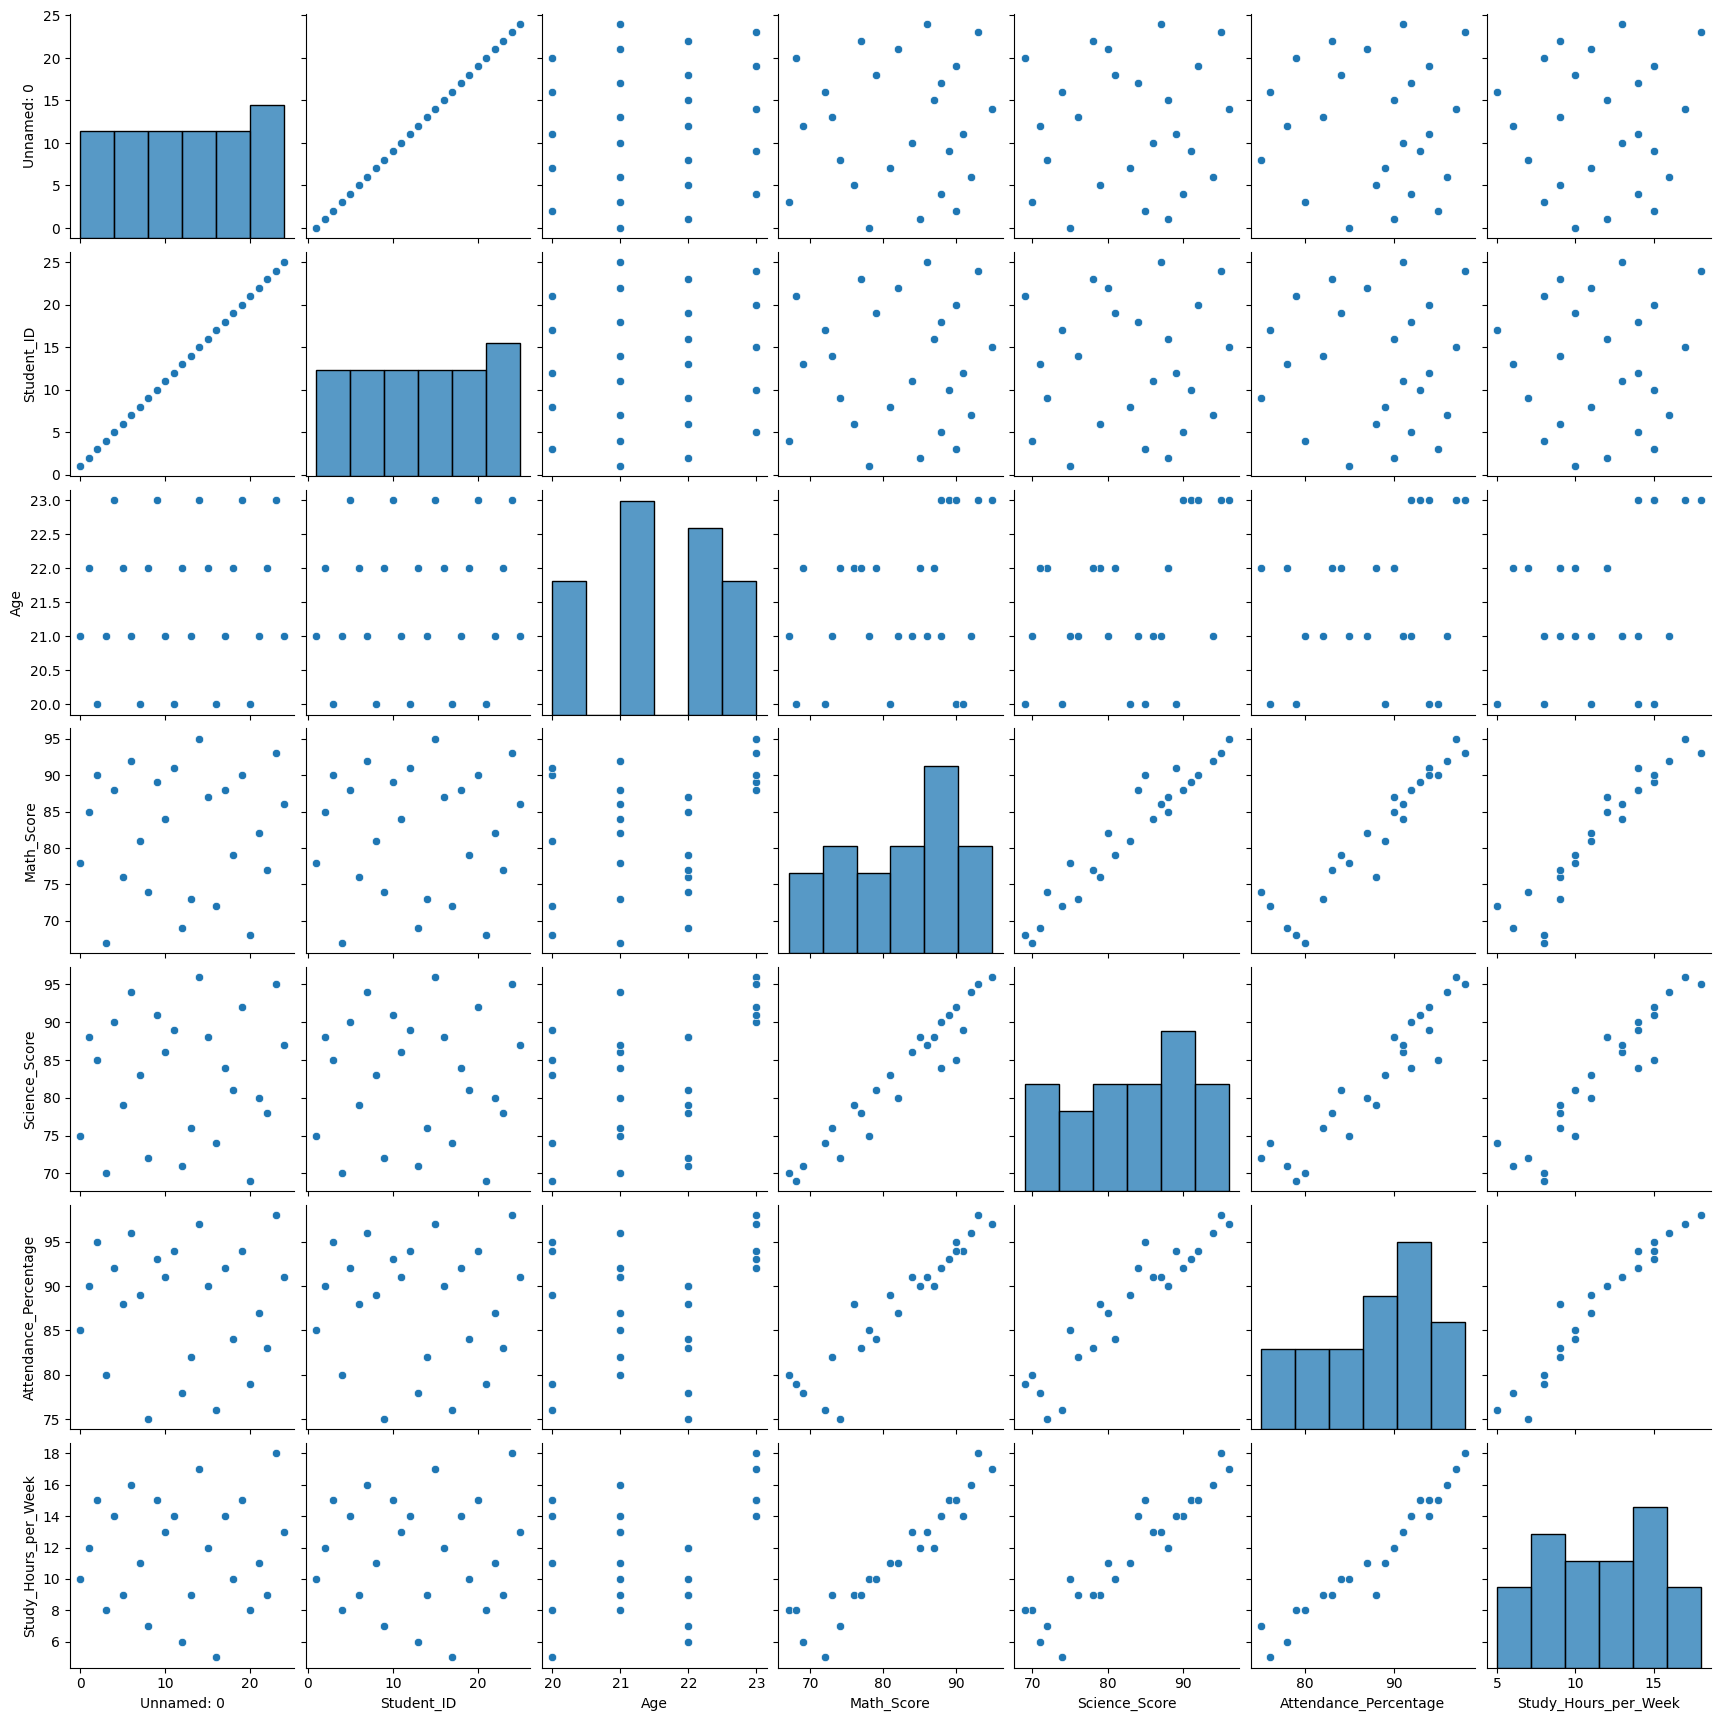

In [178]:
plt.figure(figsize=(6,4))
sns.pairplot(data)
plt.show()

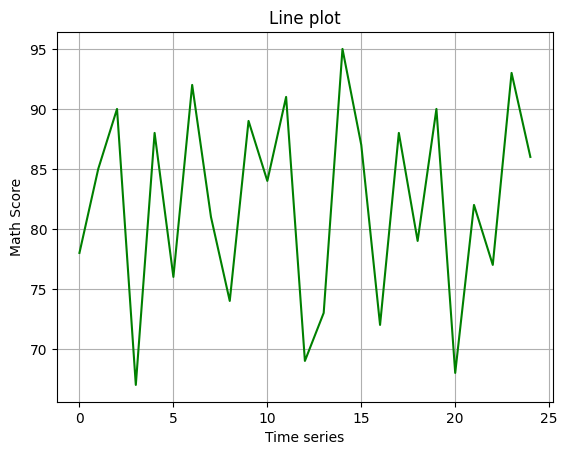

In [184]:
plt.plot(data.Math_Score,color="green")
plt.grid()
plt.title("Line plot")
plt.xlabel("Time series")
plt.ylabel("Math Score")
plt.show()

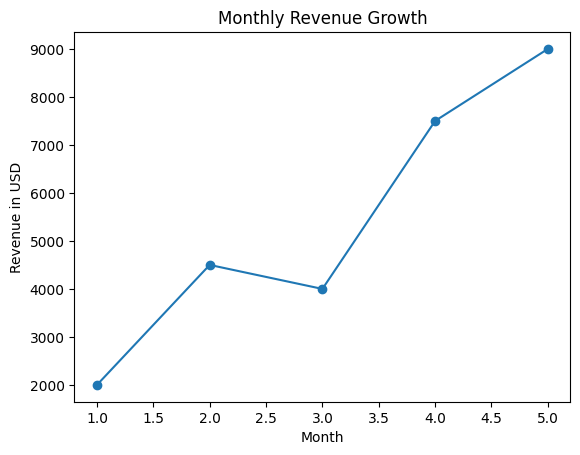

In [1]:
import matplotlib.pyplot as plt
months = [1, 2, 3, 4, 5]
revenue = [2000, 4500, 4000, 7500, 9000]
plt.plot(months, revenue, marker='o')
plt.title("Monthly Revenue Growth")
plt.xlabel("Month")
plt.ylabel("Revenue in USD")
plt.show()

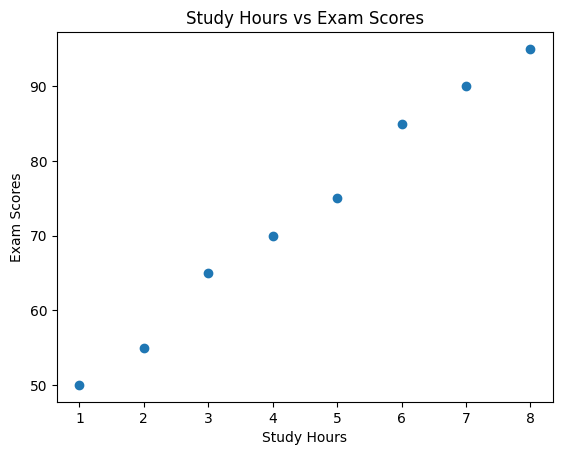

In [2]:
import matplotlib.pyplot as plt
study_hours = [1, 2, 3, 4, 5, 6, 7, 8]
scores = [50, 55, 65, 70, 75, 85, 90, 95]
plt.scatter(study_hours, scores)
plt.title("Study Hours vs Exam Scores")
plt.xlabel("Study Hours")
plt.ylabel("Exam Scores")
plt.show()